In [1]:
from torchvision.transforms import v2

import albumentations as A 

import cv2 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

c:\Python\Lib\site-packages\torch\utils\_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(
c:\Python\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
def show_img(img): 
    fig, ax = plt.subplots() 
    ax.imshow(img) 
    ax.set_xticklabels([]) 
    ax.set_yticklabels([])
    print("IMG SHAPE:", img.shape)

IMG SHAPE: (1200, 1200, 3)


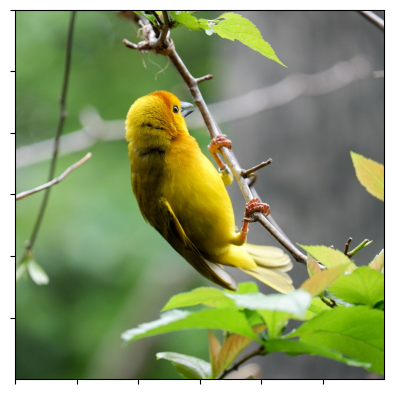

In [9]:
img = cv2.imread('./data/sample_bird_img.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

show_img(img) 

# ALBUMENTATIONS

IMG SHAPE: (1200, 1200, 3)


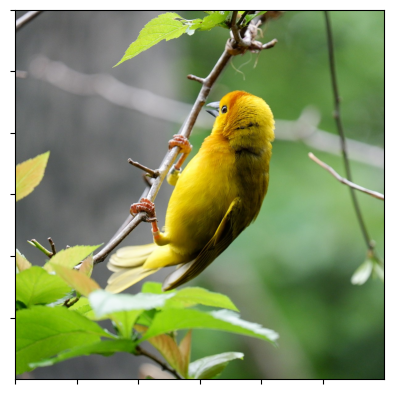

In [10]:
transform = A.HorizontalFlip(p=1) # probability 1 of horizontal flipping 

show_img(transform(image=img)['image'])

IMG SHAPE: (600, 800, 3)
IMG SHAPE: (600, 800, 3)
IMG SHAPE: (600, 800, 3)


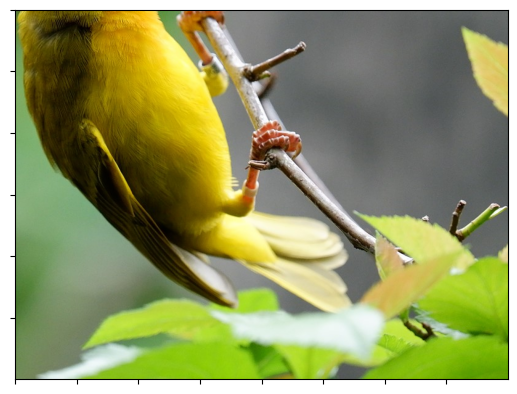

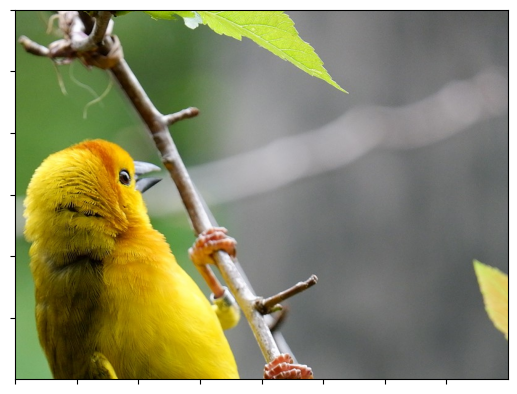

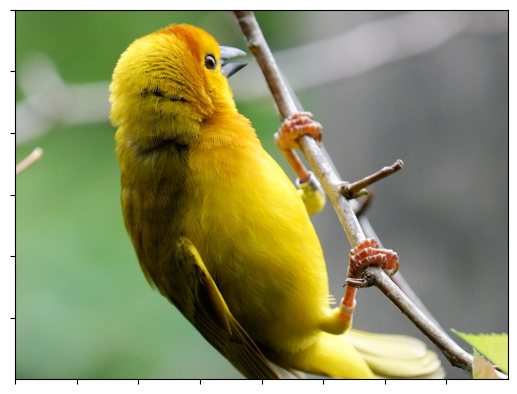

In [17]:
transform = A.RandomCrop(600, 800, p=1)

show_img(transform(image=img)['image'])
show_img(transform(image=img)['image'])
show_img(transform(image=img)['image'])

c:\Python\Lib\site-packages\albumentations\core\validation.py:58: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)


IMG SHAPE: (1200, 1200, 3)
IMG SHAPE: (1200, 1200, 3)
IMG SHAPE: (1200, 1200, 3)


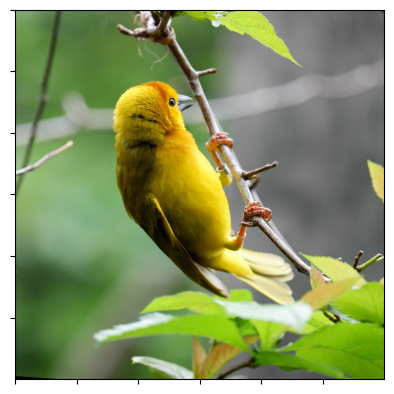

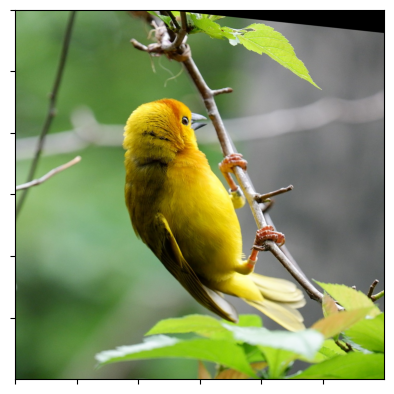

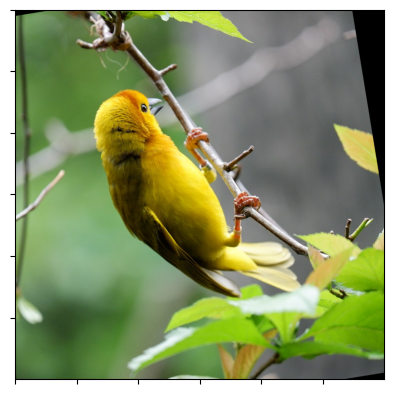

In [20]:
transform = A.ShiftScaleRotate(p=1, rotate_limit=(-10,10), scale_limit=(0.05, 0.2)) 

show_img(transform(image=img)['image'])
show_img(transform(image=img)['image'])
show_img(transform(image=img)['image'])

IMG SHAPE: (1200, 1200, 3)


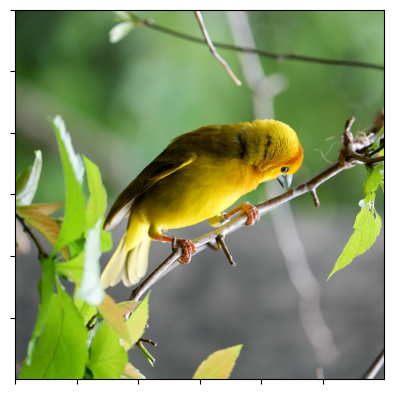

In [21]:
transform = A.RandomRotate90(p=1) 

show_img(transform(image=img)['image'])

IMG SHAPE: (1200, 1200, 3)


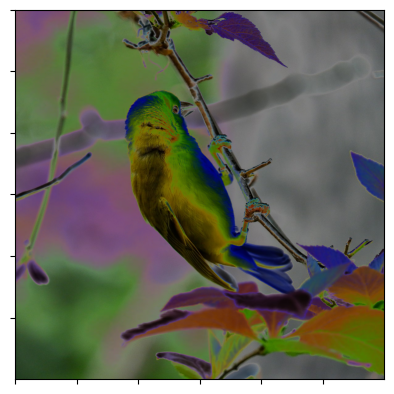

In [22]:
transform = A.Solarize(p=1)  # invert all pixel values above a threshold hehe 

show_img(transform(image=img)['image'])

IMG SHAPE: (1200, 1200, 3)


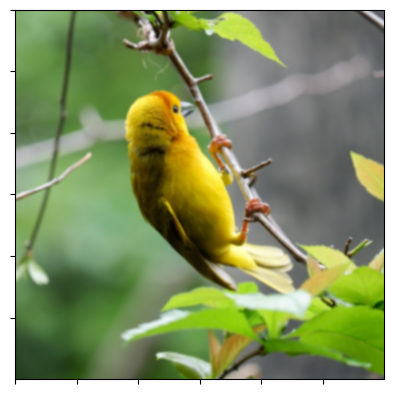

In [23]:
transform = A.GaussianBlur(p=1) # A.MotionBlur also exists 

show_img(transform(image=img)['image'])

IMG SHAPE: (1200, 1200, 3)


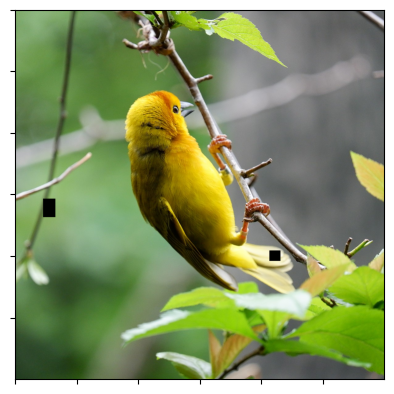

In [28]:
transform = A.CoarseDropout(num_holes_range=(1,3), hole_height_range=(20, 60), hole_width_range=(20, 60), p=1)

show_img(transform(image=img)['image'])

# TORCHVISION TRANSFORMS 

I'll also use Pillow images instead of cv2 images here, to show how it's done 

In [8]:
from PIL import Image 
import torch

IMG SHAPE: (1200, 1200, 3)


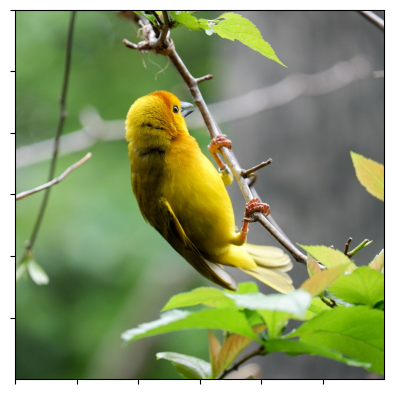

In [13]:
img = Image.open('./data/sample_bird_img.jpeg')

def show_pil_img(pil_img): 
    show_img(np.array(pil_img))

show_pil_img(img)

In [14]:
def show_torch_img(timg:torch.Tensor): # channels first 
    show_img(timg.numpy().swapaxes(0,1).swapaxes(1,2)) # channels last 
    

c:\Python\Lib\site-packages\torchvision\transforms\v2\_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


IMG SHAPE: (1200, 1200, 3)


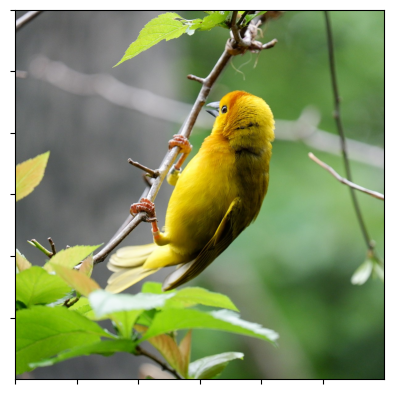

In [15]:

transforms = v2.Compose([
    v2.ToTensor(), 
    v2.RandomHorizontalFlip(p=0.5), 
    v2.ToDtype(torch.float32), # might be ConvertDtype in older torchvision versions 
])

show_torch_img(transforms(img))

In [16]:
norm_tfm = v2.Normalize(mean=[0.5, 0.5, 0.5], std=[0.3, 0.3, 0.3]) # these are dummy values to be switched out for real mean/std of training corpus 

n = norm_tfm(transforms(img)) 
print(np.min(n.numpy()), np.max(n.numpy()))

-1.6666666 1.6666666


### additional considerations for detection tasks 
since in detection, the bounding box position is important 

In [17]:
from torchvision import tv_tensors 

boxes = torch.randint(0, 600, size=(6, 4)) # XYWH 
boxes[:, 2:] += boxes[:, :2] # XYWH to XYXY 
boxes = tv_tensors.BoundingBoxes(boxes, format="XYXY", canvas_size=(1200, 1200))

img, new_boxes = transforms(img, boxes) # so it'll also return boxes 
print(boxes)
print() 
print(new_boxes)

BoundingBoxes([[452,  35, 547, 349],
               [450, 375, 663, 870],
               [253, 180, 648, 514],
               [ 54, 506, 592, 985],
               [ 35, 341, 299, 353],
               [ 21, 331, 319, 585]], format=BoundingBoxFormat.XYXY, canvas_size=(1200, 1200))

BoundingBoxes([[ 653,   35,  748,  349],
               [ 537,  375,  750,  870],
               [ 552,  180,  947,  514],
               [ 608,  506, 1146,  985],
               [ 901,  341, 1165,  353],
               [ 881,  331, 1179,  585]], format=BoundingBoxFormat.XYXY, canvas_size=(1200, 1200))
